In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df=df.drop(columns='Cabin',axis=1)
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [9]:
df.loc[:, 'Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

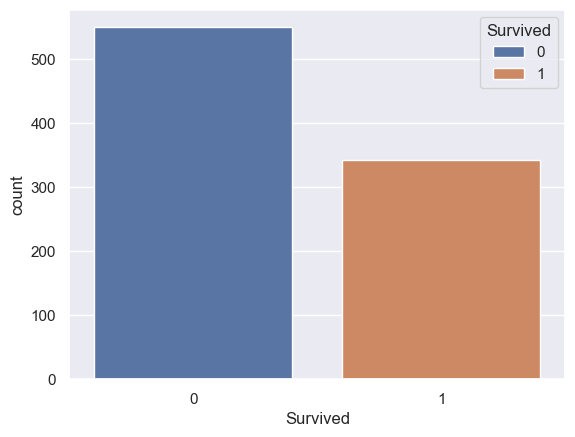

In [14]:
sns.set()
sns.countplot(x='Survived',data=df,hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

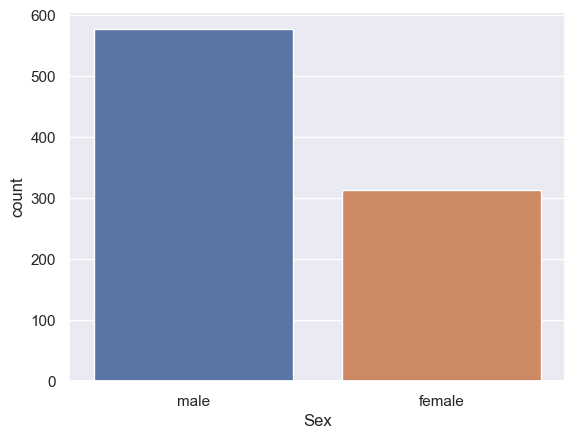

In [15]:
sns.countplot(x='Sex',data=df,hue="Sex")

<Axes: xlabel='Sex', ylabel='count'>

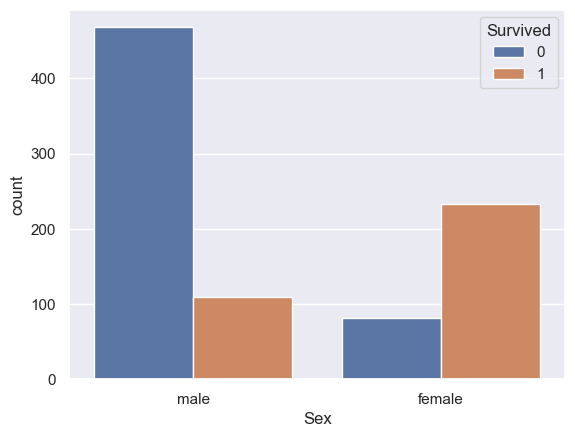

In [16]:
sns.countplot(x='Sex',data=df,hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

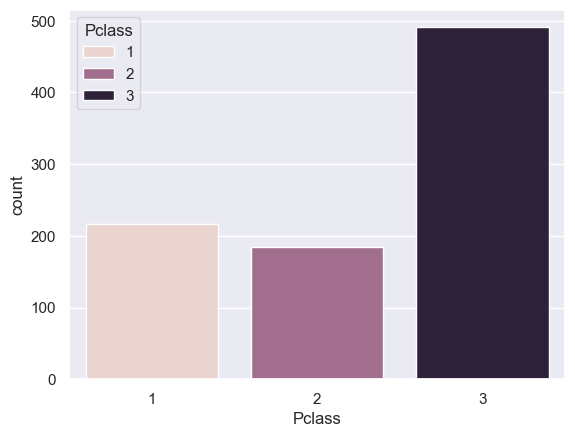

In [17]:
sns.countplot(x='Pclass',data=df,hue="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

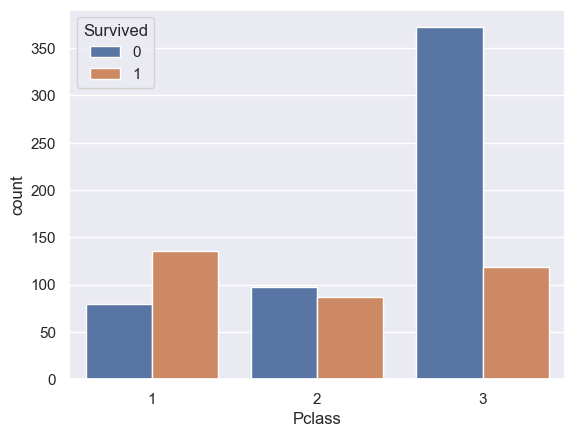

In [18]:
sns.countplot(x='Pclass',data=df,hue="Survived")

In [19]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [21]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [22]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [23]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [24]:
x = df.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
y = df['Survived']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
model=LogisticRegression(max_iter=1000)

In [27]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_prediction=model.predict(x_train)
accuracy=accuracy_score(y_prediction,y_train)
print('Accuracy:',accuracy)

Accuracy: 0.8089887640449438


In [29]:
y_prediction=model.predict(x_test)
accuracy=accuracy_score(y_prediction,y_test)
print('Accuracy:',accuracy)

Accuracy: 0.7821229050279329
